In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Observations

In [2]:
# Mass of ring
M = 392.16

# Mass of disc 
M_ = 1134.54

# Radius of wire
r = 0.45 / 10

# Radius of circular disc 
R = 12.06/2 

# Internal and external radius of ring
R1 = 9.68/2 
R2 = R

print(f'Mass of ring = {M} gm.')
print(f'Mass of disc = {M_} gm.')
print(f'Radius of wire = {r} cm.')
print(f'Radius of circular disc = {R} cm.')
print(f'Internal radius of ring = {R1} cm.')
print(f'External radius of ring = {R2} cm.')


Mass of ring = 392.16 gm.
Mass of disc = 1134.54 gm.
Radius of wire = 0.045 cm.
Radius of circular disc = 6.03 cm.
Internal radius of ring = 4.84 cm.
External radius of ring = 6.03 cm.


## Table 2.1 : for measurement of L and T

In [3]:
data = { 'l':[20,30,40,50,60],
        'TDisc1':[29.65,34.5,40.25,44.16,48.43],
        'TDisc2':[29.29,34.31,39.62,44.90,48.34],
        'TDiscMean':[0,0,0,0,0],
        'T1':[0,0,0,0,0],
        'TRing1':[38.06,43.53,50.84,56.81,60.69],
        'TRing2':[37.37,43.30,50.62,56.72,60.91],
        'TRingMean':[0,0,0,0,0],
        'T2':[0,0,0,0,0] 
    }

table1 = pd.DataFrame(data)

table1['TDiscMean']=((table1['TDisc1']+table1['TDisc2'])/2).round(2)
table1['TRingMean']=((table1['TRing1']+table1['TRing2'])/2).round(2)

table1['T1']=(table1['TDiscMean']/10).round(2)
table1['T2']=(table1['TRingMean']/10).round(2)

table1

,l,TDisc1,TDisc2,TDiscMean,T1,TRing1,TRing2,TRingMean,T2
0,20,29.65,29.29,29.47,2.95,38.06,37.37,37.72,3.77
1,30,34.50,34.31,34.40,3.44,43.53,43.30,43.42,4.34
2,40,40.25,39.62,39.94,3.99,50.84,50.62,50.73,5.07
3,50,44.16,44.90,44.53,4.45,56.81,56.72,56.76,5.68
4,60,48.43,48.34,48.39,4.84,60.69,60.91,60.80,6.08


# Calculations

In [4]:
print("Moment of inertia of ring\n")
I2 = (M*(R1**2+R2**2))/2
print(f'I2={I2} g cm^2.')

Moment of inertia of ring

I2=11722.936920000002 g cm^2.


## Table 2.2 : Calculation of n and I1

In [5]:
data = {
    'l':table1['l'],
    'T1^2':table1['T1']**2,
    'T2^2':table1['T2']**2,
    'T2^2-T1^2':[0,0,0,0,0],
    'n':[0,0,0,0,0],
    'Mean n':[0,0,0,0,0],
    'I1':[0,0,0,0,0],
    'Mean I1':[0,0,0,0,0]
}
table2 = pd.DataFrame(data)

table2['T2^2-T1^2']=(table2['T2^2']-table2['T1^2']).round(3)
table2['n']=(8*3.14159*I2*table2['l'])/(table2['T2^2-T1^2']*r**4)
table2['Mean n']=table2['n'].mean()
table2['I1']=((table2['T1^2']/table2['T2^2-T1^2'])*I2).round(2)
table2['Mean I1']=table2['I1'].mean()

table2

,l,T1^2,T2^2,T2^2-T1^2,n,Mean n,I1,Mean I1
0,20,8.7025,14.2129,5.510,2.607980e+11,2.938080e+11,18515.22,19262.39
1,30,11.8336,18.8356,7.002,3.078400e+11,2.938080e+11,19812.13,19262.39
2,40,15.9201,25.7049,9.785,2.937143e+11,2.938080e+11,19073.10,19262.39
3,50,19.8025,32.2624,12.460,2.883220e+11,2.938080e+11,18631.10,19262.39
4,60,23.4256,36.9664,13.541,3.183658e+11,2.938080e+11,20280.40,19262.39


In [6]:
I1 = M_ * R**2 / 2
I1

20626.447743

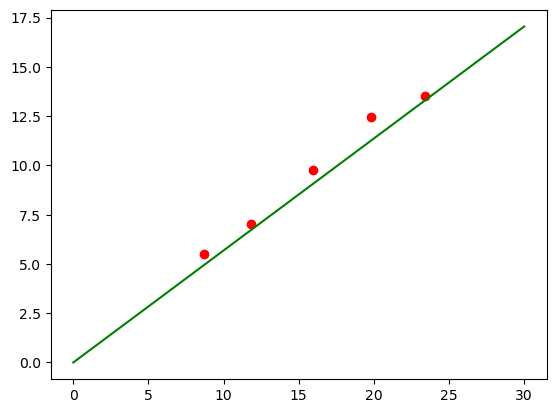

In [7]:
plt.scatter(table2['T1^2'],table2['T2^2-T1^2'],color='r')

x = np.linspace(0,30,1000)
w = I2/I1
b = 0
y=w*x+b

plt.plot(x,y,color='g')

plt.show()


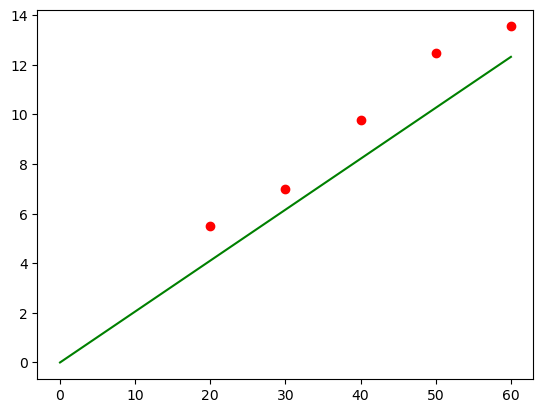

In [8]:
plt.scatter(table2['l'],table2['T2^2-T1^2'],color='r')

x = np.linspace(0,60,1000)
w = (8*3.14159*I2)/(3.5*(100000000000)*r**4)
b = 0
y=w*x+b

plt.plot(x,y,color='g')

plt.show()

## Table 2.3(a) : Error calculation for n

In [9]:
data = {
    'n':table2['n'],
    'Mean n':[0,0,0,0,0],
    'dn':[0,0,0,0,0],
    'dn^2':[0,0,0,0,0],
    'Stdn':[0,0,0,0,0]
}
table3 = pd.DataFrame(data)

table3['Mean n']=table3['n'].mean()
table3['dn']=table3['n']-table3['Mean n']
table3['dn^2']=table3['dn']**2
table3['Stdn']=(table3['dn^2'].sum()/(5*4))**0.5

table3


,n,Mean n,dn,dn^2,Stdn
0,2.607980e+11,2.938080e+11,-3.301000e+10,1.089660e+21,9.797309e+09
1,3.078400e+11,2.938080e+11,1.403197e+10,1.968961e+20,9.797309e+09
2,2.937143e+11,2.938080e+11,-9.375207e+07,8.789451e+15,9.797309e+09
3,2.883220e+11,2.938080e+11,-5.485978e+09,3.009596e+19,9.797309e+09
4,3.183658e+11,2.938080e+11,2.455777e+10,6.030840e+20,9.797309e+09


In [10]:

print(f"Sum n = {table3['n'].sum()}")
print(f"Sum dn^2 = {table3['dn^2'].sum()}")

Sum n = 1469040043101.442
Sum dn^2 = 1.9197452732273105e+21


## Table 2.2(b) : Error calculation for I

In [11]:
data = {
    'I':table2['I1'],
    'Mean I':[0,0,0,0,0],
    'dI':[0,0,0,0,0],
    'dI^2':[0,0,0,0,0],
    'StdI':[0,0,0,0,0]
}
table4 = pd.DataFrame(data)

table4['Mean I']=table4['I'].mean()
table4['dI']=table4['I']-table4['Mean I']
table4['dI^2']=table4['dI']**2
table4['StdI']=(table4['dI^2'].sum()/(5*4))**0.5

table4


,I,Mean I,dI,dI^2,StdI
0,18515.22,19262.39,-747.17,5.582630e+05,341.407323
1,19812.13,19262.39,549.74,3.022141e+05,341.407323
2,19073.10,19262.39,-189.29,3.583070e+04,341.407323
3,18631.10,19262.39,-631.29,3.985271e+05,341.407323
4,20280.40,19262.39,1018.01,1.036344e+06,341.407323


In [12]:

print(f"Sum I = {table4['I'].sum()}")
print(f"Sum dI^2 = {table4['dI^2'].sum()}")


Sum I = 96311.95000000001
Sum dI^2 = 2331179.2048000046


# Results



In [13]:
std_n = 3.5e11
n = table3['Mean n'][0]
stdn = table3['Stdn'][0]

print(f"The value of n = { n } +- { stdn } dyne/cm^2")
print(f"Standard value of n = {std_n} dyne/cm^2 ")
print(f"Percentage error = {abs(n-std_n)/std_n*100} %")

The value of n = 293808008620.2884 +- 9797309001.014795 dyne/cm^2
Standard value of n = 350000000000.0 dyne/cm^2 
Percentage error = 16.0548546799176 %


In [14]:
std_I = I1
I = table4['Mean I'][0]
stdI = table4['StdI'][0]

print(f"The value of I = { I } +- {stdI } gm cm^2")
print(f"Standard value of I = {std_I} gm cm^2 ")
print(f"Percentage error = {abs(I-std_I)/std_I*100} %")

The value of I = 19262.390000000003 +- 341.4073230614719 gm cm^2
Standard value of I = 20626.447743 gm cm^2 
Percentage error = 6.613149098651356 %
